In [1]:
# Importing Modules that will be used
#Nump, pandas, scipy, math, matpolotlib
import scipy
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import pandas_profiling
from sklearn.preprocessing import LabelEncoder

#estimators
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import cross_val_score
from sklearn import metrics


from sklearn.externals.six import StringIO 
from IPython.display import Image 
from sklearn.tree import export_graphviz
import pydotplus

#cross validation
from sklearn.model_selection import train_test_split


C:\Users\Marlos\Anaconda3\envs\Task1Env\lib\site-packages\sklearn\externals\six.py:31: FutureWarning: The module is deprecated in version 0.21 and will be removed in version 0.23 since we've dropped support for Python 2.7. Please rely on the official version of six (https://pypi.org/project/six/).
  "(https://pypi.org/project/six/).", FutureWarning)


In [2]:
#Importing Data provided by Capital One
data = pd.read_csv("default_of_cc_clients.csv", header=1)

In [3]:
#Quick Screening of the data
data.head()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month
0,1,20000,female,university,1,24,2,2,-1,-1,...,0,0,0,0,689,0,0,0,0,default
1,2,120000,female,university,2,26,-1,2,0,0,...,3272,3455,3261,0,1000,1000,1000,0,2000,default
2,3,90000,female,university,2,34,0,0,0,0,...,14331,14948,15549,1518,1500,1000,1000,1000,5000,not default
3,4,50000,female,university,1,37,0,0,0,0,...,28314,28959,29547,2000,2019,1200,1100,1069,1000,not default
4,5,50000,male,university,1,57,-1,0,-1,0,...,20940,19146,19131,2000,36681,10000,9000,689,679,not default


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 25 columns):
 #   Column                      Non-Null Count  Dtype 
---  ------                      --------------  ----- 
 0   ID                          30000 non-null  int64 
 1   LIMIT_BAL                   30000 non-null  int64 
 2   SEX                         30000 non-null  object
 3   EDUCATION                   30000 non-null  object
 4   MARRIAGE                    30000 non-null  int64 
 5   AGE                         30000 non-null  int64 
 6   PAY_0                       30000 non-null  int64 
 7   PAY_2                       30000 non-null  int64 
 8   PAY_3                       30000 non-null  int64 
 9   PAY_4                       30000 non-null  int64 
 10  PAY_5                       30000 non-null  int64 
 11  PAY_6                       30000 non-null  int64 
 12  BILL_AMT1                   30000 non-null  int64 
 13  BILL_AMT2                   30000 non-null  in

In [5]:
#Renaming columns for better understanding
data['default'] = data['default payment next month']
data = data.drop(['ID','default payment next month'], axis=1)

In [6]:
#Early Pre-Processing
data = data.drop_duplicates()

In [7]:
data.isnull().sum()

LIMIT_BAL    0
SEX          0
EDUCATION    0
MARRIAGE     0
AGE          0
PAY_0        0
PAY_2        0
PAY_3        0
PAY_4        0
PAY_5        0
PAY_6        0
BILL_AMT1    0
BILL_AMT2    0
BILL_AMT3    0
BILL_AMT4    0
BILL_AMT5    0
BILL_AMT6    0
PAY_AMT1     0
PAY_AMT2     0
PAY_AMT3     0
PAY_AMT4     0
PAY_AMT5     0
PAY_AMT6     0
default      0
dtype: int64

In [8]:
data.isna().sum()

LIMIT_BAL    0
SEX          0
EDUCATION    0
MARRIAGE     0
AGE          0
PAY_0        0
PAY_2        0
PAY_3        0
PAY_4        0
PAY_5        0
PAY_6        0
BILL_AMT1    0
BILL_AMT2    0
BILL_AMT3    0
BILL_AMT4    0
BILL_AMT5    0
BILL_AMT6    0
PAY_AMT1     0
PAY_AMT2     0
PAY_AMT3     0
PAY_AMT4     0
PAY_AMT5     0
PAY_AMT6     0
default      0
dtype: int64

In [9]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 29965 entries, 0 to 29999
Data columns (total 24 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   LIMIT_BAL  29965 non-null  int64 
 1   SEX        29965 non-null  object
 2   EDUCATION  29965 non-null  object
 3   MARRIAGE   29965 non-null  int64 
 4   AGE        29965 non-null  int64 
 5   PAY_0      29965 non-null  int64 
 6   PAY_2      29965 non-null  int64 
 7   PAY_3      29965 non-null  int64 
 8   PAY_4      29965 non-null  int64 
 9   PAY_5      29965 non-null  int64 
 10  PAY_6      29965 non-null  int64 
 11  BILL_AMT1  29965 non-null  int64 
 12  BILL_AMT2  29965 non-null  int64 
 13  BILL_AMT3  29965 non-null  int64 
 14  BILL_AMT4  29965 non-null  int64 
 15  BILL_AMT5  29965 non-null  int64 
 16  BILL_AMT6  29965 non-null  int64 
 17  PAY_AMT1   29965 non-null  int64 
 18  PAY_AMT2   29965 non-null  int64 
 19  PAY_AMT3   29965 non-null  int64 
 20  PAY_AMT4   29965 non-null  i

In [10]:
# We no longer have 30,000 datapoints, that is because some were duplicates

In [11]:
#We have to convert all non integet numbers into integers
data['SEX'].describe()

count      29965
unique         2
top       female
freq       18091
Name: SEX, dtype: object

In [12]:
data['MARRIAGE'].describe()

count    29965.000000
mean         1.551877
std          0.521997
min          0.000000
25%          1.000000
50%          2.000000
75%          2.000000
max          3.000000
Name: MARRIAGE, dtype: float64

In [13]:
data['default'].describe()

count           29965
unique              2
top       not default
freq            23335
Name: default, dtype: object

In [14]:
data['EDUCATION'].describe()

count          29965
unique             4
top       university
freq           14019
Name: EDUCATION, dtype: object

In [15]:
#WE'll create one more dataset with the original data for EDA purposes
dataog = data

In [16]:
#"Sex", "Education", and "Default" have to be converted to integers
#"Marriage" looks more like a discrete value than a continuos value so we have to convert that as well

In [17]:
#Now let's convert all this columns into binary discrete values so we can work with, them, using Label Encoder
le = LabelEncoder()
le.fit(data['SEX'])
data['SEX'] = le.transform(data['SEX'])
le.fit(data['default'])
data['default'] =le.transform(data['default'])
le.fit(data['EDUCATION'])
data['EDUCATION'] = le.transform(data['EDUCATION'])

In [18]:
data.head()

,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default
0,20000,0,3,1,24,2,2,-1,-1,-2,...,0,0,0,0,689,0,0,0,0,0
1,120000,0,3,2,26,-1,2,0,0,0,...,3272,3455,3261,0,1000,1000,1000,0,2000,0
2,90000,0,3,2,34,0,0,0,0,0,...,14331,14948,15549,1518,1500,1000,1000,1000,5000,1
3,50000,0,3,1,37,0,0,0,0,0,...,28314,28959,29547,2000,2019,1200,1100,1069,1000,1
4,50000,1,3,1,57,-1,0,-1,0,0,...,20940,19146,19131,2000,36681,10000,9000,689,679,1


In [19]:
# Based on the head comparison from before and after we can know the  following:
# FEMALE =0 and MALE=1
# Default =0, non-default =1

In [20]:
#Now based on what we know of the data "Pay_X" does not need -2 and -1, since they represent people that DID pay
#Replacing Uncessary  Values on PAY_X columns (-2, -1 converted to 0)

In [21]:
data['PAY_0'] = data['PAY_0'].replace(-2,0)
data['PAY_0'] = data['PAY_0'].replace(-1,0)
data['PAY_2'] = data['PAY_2'].replace(-2,0)
data['PAY_2'] = data['PAY_2'].replace(-1,0)
data['PAY_3'] = data['PAY_3'].replace(-2,0)
data['PAY_3'] = data['PAY_3'].replace(-1,0)
data['PAY_4'] = data['PAY_4'].replace(-2,0)
data['PAY_4'] = data['PAY_4'].replace(-1,0)
data['PAY_5'] = data['PAY_5'].replace(-2,0)
data['PAY_5'] = data['PAY_5'].replace(-1,0)
data['PAY_6'] = data['PAY_6'].replace(-2,0)
data['PAY_6'] = data['PAY_6'].replace(-1,0)

In [22]:
#Nnow let's see how the data looks after all these changes
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 29965 entries, 0 to 29999
Data columns (total 24 columns):
 #   Column     Non-Null Count  Dtype
---  ------     --------------  -----
 0   LIMIT_BAL  29965 non-null  int64
 1   SEX        29965 non-null  int32
 2   EDUCATION  29965 non-null  int32
 3   MARRIAGE   29965 non-null  int64
 4   AGE        29965 non-null  int64
 5   PAY_0      29965 non-null  int64
 6   PAY_2      29965 non-null  int64
 7   PAY_3      29965 non-null  int64
 8   PAY_4      29965 non-null  int64
 9   PAY_5      29965 non-null  int64
 10  PAY_6      29965 non-null  int64
 11  BILL_AMT1  29965 non-null  int64
 12  BILL_AMT2  29965 non-null  int64
 13  BILL_AMT3  29965 non-null  int64
 14  BILL_AMT4  29965 non-null  int64
 15  BILL_AMT5  29965 non-null  int64
 16  BILL_AMT6  29965 non-null  int64
 17  PAY_AMT1   29965 non-null  int64
 18  PAY_AMT2   29965 non-null  int64
 19  PAY_AMT3   29965 non-null  int64
 20  PAY_AMT4   29965 non-null  int64
 21  PAY_AMT5   2

In [23]:
#All integers, great!

In [24]:
#Changing the problem to a categorical problem by discretizing LIMIT_BAL

In [25]:
#Discretizing by frequency
data['LIMIT_BAL'].describe() 

count      29965.000000
mean      167442.005006
std       129760.135222
min        10000.000000
25%        50000.000000
50%       140000.000000
75%       240000.000000
max      1000000.000000
Name: LIMIT_BAL, dtype: float64

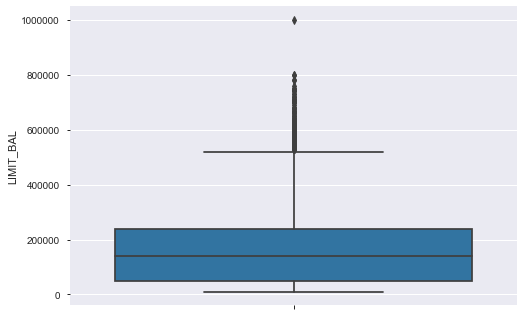

In [26]:
sns.boxplot('LIMIT_BAL', data=data, orient='v')

In [27]:
#We will try binning by frequency with 5,10 and 15 different buckets

In [28]:
databins = [9010.0,175000.0,340000.0,505000.0,670000.0,1000000.0]
datalabels =['1', '2', '3','4', '5']

In [29]:
data['LIMBAL_A'] = pd.cut(data['LIMIT_BAL'],bins=databins,labels=datalabels)

C:\Users\Marlos\Anaconda3\envs\Task1Env\lib\site-packages\seaborn\categorical.py:3669: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)


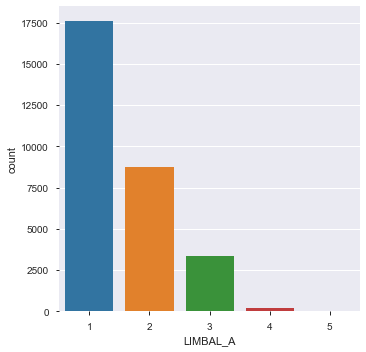

In [30]:
graph1a = sns.factorplot('LIMBAL_A', data=data, kind='count')

In [31]:
data.head()

,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,...,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default,LIMBAL_A
0,20000,0,3,1,24,2,2,0,0,0,...,0,0,0,689,0,0,0,0,0,1
1,120000,0,3,2,26,0,2,0,0,0,...,3455,3261,0,1000,1000,1000,0,2000,0,1
2,90000,0,3,2,34,0,0,0,0,0,...,14948,15549,1518,1500,1000,1000,1000,5000,1,1
3,50000,0,3,1,37,0,0,0,0,0,...,28959,29547,2000,2019,1200,1100,1069,1000,1,1
4,50000,1,3,1,57,0,0,0,0,0,...,19146,19131,2000,36681,10000,9000,689,679,1,1


In [37]:
#feautures
X = data.drop(columns=['LIMBAL_A','LIMIT_BAL','PAY_3','PAY_4','PAY_5','PAY_6'])
y = data['LIMBAL_A']

In [38]:
y = y.astype(int)

In [39]:
algos_Class = []
algos_Class.append(('Random Forest Classifier', RandomForestClassifier()))
algos_Class.append(('Decision Tree Classifier', DecisionTreeClassifier()))

In [40]:
#classification
results = []
names = []
for name, model in algos_Class:
        result = cross_val_score(model, X , y , cv=3, scoring='accuracy')
        names.append(name)
        results.append(result)

In [41]:
for i in range (len(names)):
    print(names[i], results[i].mean())

Random Forest Classifier 0.694042905880222
Decision Tree Classifier 0.6041047835839287


In [42]:
#Train/Test Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = .30, random_state = 134)

In [43]:
#Model Selected
algo = RandomForestClassifier(max_depth=17)
model = algo.fit(X_train, y_train)

In [44]:
#Making Predictions
predictions = model.predict(X_test)
print("Accuracy:", metrics.accuracy_score(y_test, predictions))

Accuracy: 0.7015572858731924


In [45]:
print(classification_report(y_test, predictions))

              precision    recall  f1-score   support

           1       0.77      0.88      0.82      5330
           2       0.55      0.55      0.55      2613
           3       0.57      0.18      0.27       984
           4       0.00      0.00      0.00        50
           5       0.00      0.00      0.00        13

    accuracy                           0.70      8990
   macro avg       0.38      0.32      0.33      8990
weighted avg       0.68      0.70      0.68      8990



C:\Users\Marlos\Anaconda3\envs\Task1Env\lib\site-packages\sklearn\metrics\_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [46]:
data.groupby('LIMBAL_A')['LIMBAL_A'].count()

LIMBAL_A
1    17611
2     8774
3     3374
4      170
5       36
Name: LIMBAL_A, dtype: int64